# calculation of the coupling capacitor:

In [6]:
from scipy.special import *
from math import *
import numpy as np  
from scipy.constants import *
import matplotlib.pyplot as plt

In [7]:
#import sympy as sy
#x, y, z = symbols('x y z')
#init_printing(use_unicode=True)

In [8]:
%matplotlib inline

In [9]:
def k_sinh(h,w,g):
    return np.sinh(np.pi*w/(4.*h))/np.sinh(np.pi*(w+2.*g)/(4.*h)) 

In [10]:
def k_tanh(h,w,g):
    return np.tanh(np.pi*w/(4.*h))/np.tanh(np.pi*(w+2.*g)/(4.*h))

In [11]:
#complete elliptic integral of first kind
def K(x):
    return ellipk(x)

def k_strich(x):
    return np.sqrt(1.-x**2)

In [12]:
h1 = 350.
h3 = 3000.
h4 = 3000.

In [13]:
def conformal(w,g):                            #calculates the inductance and capacitance per unit length
    k1 = k_sinh(h1,w,g)
    k3 = k_tanh(h3,w,g)
    k4 = k_tanh(h4,w,g)
    K1 = ellipk(k1)
    K12 = ellipk((1-k1**2.)**0.5)
    K3 = ellipk(k3)
    K32 = ellipk((1-k3**2.)**0.5)
    K4 = ellipk(k4)
    K42 = ellipk((1-k4**2.)**0.5)
    k0 = w/(w+2.*g)
    k01 = (1-k0**2.)**0.5
    K0 = ellipk(k0)
    K01 = ellipk(k01)
    q1 = (K1/K12)*(K3/K32 + K4/K42)**(-1)
    eff = 1. + (e_r-1)*q1
    C = 4*epsilon_0*eff*(K0/K01)
    L = mu_0/4*(K01/K0)
    return L, C

In [14]:
def imp_Al_CPW(w,g):                      #impedance Z for an Al CPW 
    L = conformal(w,g)[0]
    C = conformal(w,g)[1]
    Z = (L/C)**0.5
    return Z

In [15]:
def cap_width(N,w_real,s):
    return (N*w_real+(N-1)*s)

In [16]:
def s_G(N,w_real,s):                              #N: number of fingers, w_real: finger width, s: gap between finger
    return (N*w_real+(N-1)*s)*ratio               #gap of the outermost fingers to the ground planes 

In [17]:
#parameters of the finger capacitor:

cw = 10.e-6
cg = 6.e-6

In [18]:
ratio = cg/cw                    #ratio is a good approximation for widths smaller than 100 mu

In [19]:
N = 3.                              #number of fingers
G = 3.e-6                            #gap at open finger end 
L = 100.e-6-2*G                         #overlap of the fingers

In [20]:
e_r = 11.9                          #dielectrical constant substrate:

In [21]:
#real finger width:
w_real = 3.e-6
#metal layer thickness:
t = 100.e-9
#effective finger width to account for the thickness of the metallization layer
w = w_real+t/np.pi*(1+np.log(4*np.pi*w_real/t))

In [22]:
print 'thickness correction: ',w/w_real

thickness correction:  1.07355315592


In [23]:
#finger gap/ space between finger
s = 3.e-6

#substrate height:
h = 350.e-6

In [24]:
cap = cap_width(4,w_real,s)

In [25]:
print cap*10**6

21.0


In [26]:
gap =  s_G(5,w_real,s)

print 'gap = {} mu'.format(gap*10**6)

gap = 16.2 mu


In [27]:
#def s_g = (N*w_real+(N-1)*s)*ratio              #gap of the outermost fingers to the ground planes:
s_g = 70.e-6
print 's_g = ', s_g*10**6, 'mu' 

s_g =  70.0 mu


In [28]:
k5 = np.sqrt(s_g/(w+s_g))
k05 = np.sqrt(1.-k5**2.)
k6 = np.sqrt((np.exp(np.pi*w/h)-1.)/(np.exp(np.pi*(w+s_g)/h)-1.))
k06 = np.sqrt(1.-k6**2.)

In [29]:
Ccpw1 = 2.*epsilon_0*K(k_strich(k5))/K(k5)+epsilon_0*(e_r-1.)*K(k6)/K(k_strich(k6))

print 2*Ccpw1, 'F/m'

1.09640908336e-10 F/m


In [30]:
#capcitance at the left port (more fingers if the total number is odd)
C1 = 2.*Ccpw1*(L+G)

print "C1 = ", C1

C1 =  1.06351681086e-14


In [31]:
#capacitance at the right port:
C2 = C1/2.

print "C2 = ", C2

C2 =  5.31758405431e-15


In [32]:
#comparison to cpw:
w_cpw = 3.e-6
g_cpw = s_g+w+g

k0 = w_cpw/(w_cpw+2.*g_cpw)
k01 = (1.-k0**2.)**0.5
K0 = ellipk(k0)
K01 = ellipk(k01)

e1=11.9

eff1 = (1+e1)/2

C_l = 4*epsilon_0*eff1*(K0/K01)

print 'capacitance per unit length: C_l = ', C_l, 'F/m'

capacitance per unit length: C_l =  2.05952000024e-11 F/m


In [33]:
#C3: finger capacitor with 3 finger:
correctionk1 = np.sqrt((1-((w+2*s)/(3*w+2*s))**2.)/(1-(w/(3*w+2*s))**2))
k1 = (w/(w+2*s))*correctionk1
correctionk2 = np.sqrt((np.sinh(np.pi*(3*w+2*s)/(4*h))**2-np.sinh(np.pi*(w+2*s)/(4*h))**2)/(np.sinh(np.pi*(3*w+2*s)/(4*h))**2-np.sinh(np.pi*(w)/(4*h))**2))
k2 = np.sinh(np.pi*w/(4*h))/np.sinh(np.pi*(w+2*s)/(4*h))*correctionk2
q1 = K(k_strich(k1))*K(k2)/(K(k1)*K(k_strich(k2)))
e_eff = 1.+q1*(e_r-1.)/2.
C3 = 4*epsilon_0*e_eff*K(k1)/K(k_strich(k1))*L

print correctionk1
print correctionk2
print 'C3 =', C3*10**15, 'fF'

0.8259829208
0.826034655334
C3 = 12.2749957688 fF


In [34]:
#CN: (N-3) periodical structure
k3 = w/(w+s)
correctionk4 = np.sqrt((np.cosh(np.pi*(w+s)/(4*h))**2+np.sinh(np.pi*(w+s)/(4*h))**2)/(np.cosh(np.pi*(w)/(4*h))**2+np.sinh(np.pi*(w+s)/(4*h))**2))
k4 = np.sinh(np.pi*w/(4*h))/np.sinh(np.pi*(w+2*s)/(4*h))*correctionk4
q_N = K(k_strich(k3))*K(k4)/(K(k3)*K(k_strich(k4)))
e_N = 1.+q_N*(e_r-1.)/2.
CN = (N-3)*epsilon_0*e_N*K(k3)/K(k_strich(k3))*L

#print 'q_N =', q_N

In [35]:
#C_end: capacitance of the fingers open ends 
# only valid for G/(w+2*s) < 0.2
e_oe = (e_r+1.)/2.
nu = G/(w+s)
C_oe1 = 2*(epsilon_0/np.pi)*((w+s)*(np.log(np.sqrt(1.+nu**2.)*nu)/nu+np.log((np.sqrt(1+nu**2)+1)/nu)-1/3*(1/(1+np.sqrt(1+nu**2.))+1/(nu+np.sqrt(1+nu**2))))-(w+2/3*s))
C_oe = e_oe*C_oe1


C_end = N*C_oe

In [36]:
#C_end: different approach:
ground = 10.e-6
k_1end = np.sinh(np.pi*w/(4*h))/np.sinh(np.pi*(w+G)/(4*h))
correctionk0 = np.sqrt((1.-((w+G)/(w+ground+G))**2.)/(1.-((w)/(w+ground+G))**2.))
k_0end = w/(w+G)*correctionk0
q_end = K(k_1end)*K(k_strich(k_0end))/(K(k_strich(k_1end))*K(k_0end))
e_end = 1+q_end*(e_r-1.)/2.


C_end2 = 4*N*w*(1+np.pi/2)*epsilon_0*e_end*K(k_0end)/K(k_strich(k_0end))

In [37]:
print 'C_end2 =', C_end2*10**15, 'fF'
print 'C_N =', CN*10**15, 'fF'
print
print 'k1 =', k1
print 'k2 =', k2
print 'k3 =', k3
print 'k4 =', k4
print 'k5 =', k5
print 'k6 =', k6

Cs = C3 + CN + C_end2
print 'C1 =',C1*10**15, 'fF'
print 'C2 =',C2*10**15, 'fF'
print 'Cs =',Cs*10**15, 'fF'
Cc = C1 + 1/(1/Cs + 1/C2)
Cc2 = C1+Cs+C2

C = (C1+C2+C1*C2/Cs)/(1+C2/Cs)

print 'C =', C*10**15, 'fF'
print Cc*10**15, 'fF'
print Cc2*10**15, 'fF'

C_end2 = 4.38228980511 fF
C_N = 0.0 fF

k1 = 0.288505363785
k2 = 0.288505359321
k3 = 0.517736018898
k4 = 0.349290344499
k5 = 0.977759855002
k6 = 0.177643829349
C1 = 10.6351681086 fF
C2 = 5.31758405431 fF
Cs = 16.6572855739 fF
C = 14.6659777405 fF
14.6659777405 fF
32.6100377369 fF


In [38]:
print s_G(3,3.e-6,3.e-6)

9e-06


In [39]:
def get_C_idc(W,G,L,N): #  W:Width, G:Gap, L:Length, N:number electrodes
         lam = 2*(W+G)
         eta = 2*W/lam
         kEinf = 2*eta**0.5/(1+eta)
         k_pEinf = (1.-kEinf**2)
         kIinf = np.sin(pi/2*eta)
         k_pIinf = (1.-kIinf**2)
         CI = epsilon_0*L*(1.+11.9)*ellipk(kIinf)/ellipk(k_pIinf)
         CE = epsilon_0*L*(1.+11.9)*ellipk(kEinf)/ellipk(k_pEinf)
         C_idc = (N-3)*CI/2+2*CI*CE/(CI+CE)
         return C_idc*1e15 # fF

def get_C_idc_few(W,G,L,N): #  W:Width, G:Gap, L:Length, N:number electrodes
         lam = 2*(W+G)
         eta = 2*W/lam
         kEinf = 2*eta**0.5/(1+eta)
         k_pEinf = (1-kEinf**2)
         kIinf = np.sin(pi/2*eta)
         print 'kInf =', kIinf
         print 'kEinf =', kEinf
         k_pIinf = (1-kIinf**2)
         CI = epsilon_0*L*(1.+11.9)*ellipk(kIinf)/ellipk(k_pIinf)
         CE = epsilon_0*L*(1.+11.9)*ellipk(kEinf)/ellipk(k_pEinf)
         print 'CI =', CI*10**15, 'fF'
         print 'CE =', CE*10**15, 'fF'
         C_idc = N*CI/2.+2.*CI*CE/(CI+CE)
         return C_idc*1e15 # fF
        
print get_C_idc(w,s,L,N)
print get_C_idc(w_real,s,L,N) 
print get_C_idc_few(w_real,s,L,N)


print get_C_idc_few(w_real,s,L,2)


print get_C_idc(w,s,L,5)

15.089083317
14.7320502431
kInf = 0.707106781187
kEinf = 0.942809041582
CI = 12.0794705621 fF
CE = 18.8774188091 fF
32.8512560862
kInf = 0.707106781187
kEinf = 0.942809041582
CI = 12.0794705621 fF
CE = 18.8774188091 fF
26.8115208051
27.4982577441


# Analytical formula functions

In [108]:
def overlap(L,G):
    return L-2*G                     #length of finger overlap

In [97]:
#capcitance at the left port (more fingers if the total number is odd)
def C1(w,s_g,overlap,G):
        k5 = np.sqrt(s_g/(w+s_g))
        k6 = np.sqrt((np.exp(np.pi*w/h)-1.)/(np.exp(np.pi*(w+s_g)/h)-1.))
        Ccpw1 = 2.*epsilon_0*K(k_strich(k5))/K(k5)+epsilon_0*(e_r-1.)*K(k6)/K(k_strich(k6))
        print 'C_cpw1 =', Ccpw1*10**12, 'pF/m'
        return 2.*Ccpw1*(overlap+G)

In [107]:
def k0(w,s):
    return w/(w+2.*s)

In [106]:
def C_end2(N,ground,w,G):
    k_1end = np.sinh(np.pi*w/(4*h))/np.sinh(np.pi*(w+G)/(4*h))
    correctionk0 = np.sqrt((1.-((w+G)/(w+ground+G))**2.)/(1.-((w)/(w+ground+G))**2.))
    k_0end = w/(w+G)*correctionk0
    q_end = K(k_1end)*K(k_strich(k_0end))/(K(k_strich(k_1end))*K(k_0end))
    e_end = 1+q_end*(e_r-1.)/2.
    return 4*N*w*(1+np.pi/2)*epsilon_0*e_end*K(k_0end)/K(k_strich(k_0end))

In [105]:
def C_end3(N,ground,w,s,G):
    x = 0.25*s
    k_1end = np.sinh(np.pi*x/(4*h))/np.sinh(np.pi*(x+G)/(4*h))
    correctionk0 = np.sqrt((1.-((x+G)/(x+ground+G))**2.)/(1.-((x)/(x+ground+G))**2.))
    k_0end = x/(x+G)*correctionk0
    q_end = K(k_1end)*K(k_strich(k_0end))/(K(k_strich(k_1end))*K(k_0end))
    e_end = (e_r+1)/2.
    return 4*N*s*(1+np.pi/2)*epsilon_0*e_end*K(k_0end)/K(k_strich(k_0end))

In [104]:

def Cs(C3,CN,C_end):
    return C3+CN+C_end

In [103]:
#C3: finger capacitor with 3 finger:
def C3(w,s,overlap):
    correctionk1 = np.sqrt((1-((w+2*s)/(3*w+2*s))**2.)/(1-(w/(3*w+2*s))**2))
    k1 = (w/(w+2*s))*correctionk1
    correctionk2 = np.sqrt((np.sinh(np.pi*(3*w+2*s)/(4*h))**2-np.sinh(np.pi*(w+2*s)/(4*h))**2)/(np.sinh(np.pi*(3*w+2*s)/(4*h))**2-np.sinh(np.pi*(w)/(4*h))**2))
    k2 = np.sinh(np.pi*w/(4*h))/np.sinh(np.pi*(w+2*s)/(4*h))*correctionk2
    q1 = K(k_strich(k1))*K(k2)/(K(k1)*K(k_strich(k2)))
    e_eff = 1.+q1*(e_r-1.)/2.
    return 4*epsilon_0*e_eff*K(k1)/K(k_strich(k1))*overlap

In [102]:
#CN: (N-3) periodical structure
def CN(N,w,s,overlap):
    k3 = w/(w+s)
    correctionk4 = np.sqrt((np.cosh(np.pi*(w+s)/(4*h))**2+np.sinh(np.pi*(w+s)/(4*h))**2)/(np.cosh(np.pi*(w)/(4*h))**2+np.sinh(np.pi*(w+s)/(4*h))**2))
    k4 = np.sinh(np.pi*w/(4*h))/np.sinh(np.pi*(w+2*s)/(4*h))*correctionk4
    q_N = K(k_strich(k3))*K(k4)/(K(k3)*K(k_strich(k4)))
    e_N = 1.+q_N*(e_r-1.)/2.
    return (N-3)*epsilon_0*e_N*K(k3)/K(k_strich(k3))*overlap

In [48]:
def Q_L(f_res,deltaf):
    return f_res/deltaf

In [49]:
def Q_ext(Q_int,Q_L):
    return Q_int*Q_L/(Q_int - Q_L)

In [50]:
def Ccoupling(L,wres,Q_ext):
    Z_0 = 50.
    A = 1/(L*wres**4.*Z_0**2.*Q_ext**2.)
    solve(x**4.-A*x-A*C,x)

In [51]:
#resonance frequency of a coupled resonator (L2 is the additional inductance due to the coupling capacitor)
def fresc(L_l,C_l,l,Cc,C2,L2):
    Z_0 = 50.
    fres = c/(4.*l*eff1**0.5)
    L = 8*L_l*l/np.pi**2
    C = C_l*l/2
    C_star = Cc/(1+(2*np.pi*fres*Cc*Z_0)**2)
    return 1/(2*np.pi*np.sqrt((L+L2)*(C+C_star+C2)))

# example I

In [52]:
N1 = 4.
G1 = 10e-6
L1 = 60e-6
w_real1 = 15e-6
g1 = 10e-6

In [53]:
t1 = 100.e-9                         #metal layer thickness:

w1 = w_real1+t1/np.pi*(1+np.log(4.*np.pi*w_real1/t1))     #effective finger width (due to finit layer thickness)

print 'width correction due to the finit layer thickness: ',w_real/w

width correction due to the finit layer thickness:  0.931486246848


In [83]:
wt = N1*w_real1+N1*g1

In [85]:
g_TL = np.linspace(45e-6,55e-6,100)

In [84]:
imp_Al_CPW(wt,50e-6)

0.0001

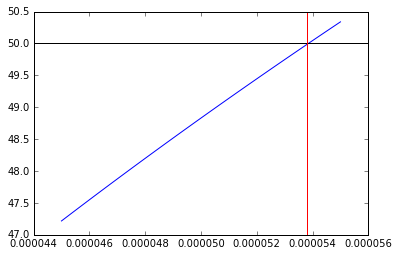

In [92]:
plt.plot(g_TL, imp_Al_CPW(wt, g_TL))
plt.axhline(50, color = 'black')
plt.axvline(53.8e-6, color = 'red')

In [93]:
G_TL = 54e-6

In [100]:
#capacitance at the right port:

C2 = C1(w/2.,G_TL,L1,G)
print 'C2 =', C2*10**15, 'fF'

C_cpw1 = 53.4328602975 pF/m
C2 = 6.73254039748 fF


In [111]:
C3(w1,G1,L1)

8.8576649398761444e-15

In [112]:
CN(N,w1,G1,L1)

1.2395266060533363e-14

In [117]:
C_end3(N,G_TL,w1,G1, G1)

2.3138401207282323e-14

In [118]:
Cs1 = Cs(C3(w1,G1,L1),CN(N,w1,G1,L1),C_end3(N,G_TL,w1,G1, G1))

In [119]:
print Cs1

4.43913322077e-14


# example II

In [54]:
h = 350.e-6                         #substrate height:

In [55]:
#parameters of the finger capacitor:
N = 3.                               #number of fingers
G = 3.e-6                            #gap at open finger end 
L = 80.e-6                           #finger length

In [56]:
overlap1 = overlap(L,G)

In [57]:
e_r = 11.9                          #dielectrical constant substrate:

w_real = 3.e-6                      #real finger width:
s = 3.e-6                           #finger gap width
ground = 10.e-6                     #finger base polygon thickness

t = 100.e-9                         #metal layer thickness:

w = w_real+t/np.pi*(1+np.log(4*np.pi*w_real/t))     #effective finger width (due to finit layer thickness)

print 'width correction due to the finit layer thickness: ',w_real/w

width correction due to the finit layer thickness:  0.931486246848


In [58]:
s_g1 = s_G(N,w_real,s)

In [59]:
#capacitance at the right port:

C2 = C1(w,s_g1,overlap1,G)/2.
print 'C2 =', C2*10**15, 'fF'

C_cpw1 = 87.2545314531 pF/m
C2 = 6.71859892189 fF


In [60]:
##########################################################
#comparison to cpw: assumption for the second parasitaric capacitance to ground (C2)
w_cpw = 3.e-6                    #width cpw
g_cpw = s_g1+w+s                  #only a good assumption for n = 3

e1=11.9

eff1 = (1+e1)/2

C_l = 4*epsilon_0*eff1*(K(k0(w_cpw,g_cpw))/K(k_strich(k0(w_cpw,g_cpw))))

print 'capacitance per unit length(CPW) for w =',w_cpw*10**6,'mu and g =',g_cpw*10**6,'mu: C_l = ', C_l, 'F/m'
C2_strich = C_l*L
print 'C_2# =', C2_strich*10**15, 'fF'

capacitance per unit length(CPW) for w = 3.0 mu and g = 15.2206594678 mu: C_l =  8.8589377263e-11 F/m
C_2# = 7.08715018104 fF


In [61]:
#additional inductance:
L_l = mu_0/4*(K(k_strich(k0(w_cpw,g_cpw)))/K(k0(w_cpw,g_cpw)))


print 'inductance per unit length(CPW):L_l',L_l
L2 = L_l*L
print '==> L_2# =',L2 

inductance per unit length(CPW):L_l 8.10096321169e-07
==> L_2# = 6.48077056935e-11


In [62]:
print 'C3 =', C3(w,s,overlap1)*10**15, 'fF'

C3 = 9.66329454141 fF


In [63]:
#C_end: capacitance of the fingers open ends 
# only valid for G/(w+2*s) < 0.2
e_oe = (e_r+1.)/2.
nu = G/(w+s)
C_oe1 = 2*(epsilon_0/np.pi)*((w+s)*(np.log(np.sqrt(1.+nu**2.)*nu)/nu+np.log((np.sqrt(1+nu**2)+1)/nu)-1/3*(1/(1+np.sqrt(1+nu**2.))+1/(nu+np.sqrt(1+nu**2))))-(w+2/3*s))
C_oe = e_oe*C_oe1
C_end = N*C_oe

In [64]:
#C_end: different approach:

print 'C_end2 =', C_end2(N,ground,w,G)*10**15, 'fF'
print 'C_N =', CN(N,w,s,overlap1)*10**15, 'fF'


Cs1 = Cs(C3(w,s,overlap1),CN(N,w,s,overlap1),C_end2(N,ground,w,G))
print 'Cs =',Cs1*10**15, 'fF'

C_end2 = 4.38228980511 fF
C_N = 0.0 fF
Cs = 14.0455843465 fF


In [65]:
Cc = C1(w,s_g1,overlap1,G) + 1/(1/Cs1 + 1/C2)
Cc2 = C1(w,s_g1,overlap1,G)+Cs1+C2


#C = (C1(w,s_g1,overlap1,G)+C2+C1(w,s_g1,overlap1,G)*C2/Cs1)/(1+C2/Cs1)

C_cpw1 = 87.2545314531 pF/m
C_cpw1 = 87.2545314531 pF/m


In [66]:
#quality factor:

losstan = 0.004
Q_int = 1/losstan

In [67]:
#######################introducing the resonator: ###########################
#connected CPW:
cw = 10.e-6            
cg = 6.e-6

ratio = cg/cw

s_g1 = 36.e-6
print 'gap of the outermost fingers to ground: s_g = ', s_g1*10**6, 'mu' 

w_res = 10.e-6                    #cpw width
g_res = 6.e-6                     #cpw gap
l_res = 2511.e-6                  #cpw length

e1=11.9

eff1 = (1+e1)/2

C_lres = 4*epsilon_0*eff1*(K(k0(w_res,g_res))/K(k_strich(k0(w_res,g_res))))
L_lres = mu_0/4*(K(k_strich(k0(w_res,g_res)))/K(k0(w_res,g_res)))

print 'C_l (resonator) =', C_lres, 'F/m'
print 'L_l (resonator) =', L_lres, 'H/m'

L = 8*L_lres*l_res/np.pi**2
C = C_l*l_res/2
Z_0 = 50.

gap of the outermost fingers to ground: s_g =  36.0 mu
C_l (resonator) = 1.63677498973e-10 F/m
L_l (resonator) = 4.38459342705e-07 H/m


In [68]:
#first coupling capacitor: N = 3, sg = 30 mu

print 'coupling capacitor: N = 3, l_finger = 80mu, s_g = 30 mu'
print
print



Cs2 = Cs(C3(w,s,overlap1),CN(N,w,s,overlap1),C_end3(N,ground,w,s,G))

print 'coupled resonator:'
print 'Cs =', Cs2*10**15, 'fF'
print 'C2 =', C2*10**15, 'fF'
print 'f_res (s_g = 30 mu) =', fresc(L_lres,C_lres,l_res,Cs2,C2,0)*10**(-9), 'GHz'
print 'f_sim =', 11.256,'GHz'
print
C_s_tilde2 = Cs1/(1+(w_res*Z_0*Cs1)**2/(1+(w_res*2*C2*Z_0)**2))
print 'corrected Cs =', C_s_tilde2*10**15, 'fF'

coupling capacitor: N = 3, l_finger = 80mu, s_g = 30 mu


coupled resonator:
Cs = 12.248193912 fF
C2 = 6.71859892189 fF
f_res (s_g = 30 mu) = 11.2457371673 GHz
f_sim = 11.256 GHz

corrected Cs = 14.0455843465 fF


In [69]:
print 'coupling capacitor: s_g = 9 mu, w_finger = 3 mu, g_finger = 3 mu'
print
s_g2 = (N*w_real+(N-1)*s)*ratio 
C1_1 = C1(w,s_g2,overlap1,G)
print 'C1 =', C1_1*10**15, 'fF'
C2_1 = C1_1/2.
print 'C2 =', C2_1*10**15, 'fF'
print 'f_res (s_g = 9 mu) =', fresc(L_lres,C_lres,l_res,Cs1,C2_1,0)*10**(-9), 'GHz'
print 'f_sim =', 11.114,'GHz'

coupling capacitor: s_g = 9 mu, w_finger = 3 mu, g_finger = 3 mu

C_cpw1 = 87.2545314531 pF/m
C1 = 13.4371978438 fF
C2 = 6.71859892189 fF
f_res (s_g = 9 mu) = 11.2012895833 GHz
f_sim = 11.114 GHz


In [70]:
##############################different calculation of Cs:#####################################
fres_bare = c/(4.*l_res*eff1**0.5)
#print 'bare resonator resonance frequency: f_res,bare =', fres_bare*10**(-9), 'GHz'
w_res = 2.*np.pi*fres_bare
C_s_tilde = Cs1/(1+(w_res*Z_0*Cs1)**2/(1+(w_res*C1_1*Z_0)**2))

print 'corrected Cs =', C_s_tilde*10**15, 'fF'

corrected Cs = 14.0080043916 fF


In [71]:
####################################################################################
#j = complex(0,1)
#C_tild = Cs1*(1+j*w_res*C1_1*Z_0)**2./((1+j*w_res*C1_1*Z_0)**2.+(w_res*Z_0*Cs1)**2.)

#print C_tild.real*10**15, 'fF'


####################################################################
#C1star = (1+(w_res*C1_1*Z_0)**2.)/((w_res*Z_0)**2.*C1_1)
#C_G = (1/C1star+1/Cs1)**(-1)
#print Cs1
#print C_G

In [72]:

#coupling capacitor: N = 4, l_finger = 80, w_finger = 3, s_finger = 3, s_g = 
N2 = 4

s_g = 6.e-6

Cs2 = Cs(C3(w,s,overlap1),CN(N2,w,s,overlap1),C_end3(N2,ground,w,s,G))



print 
print 'coupling capacitor: N = 4, l_finger = 80mu, s_g = ',s_g*10**6
print 's_g = ', s_g*10**6, 'mu'

C1_2 = C1(w,s_g,overlap1,G)/2.
C2_2 = C1_2

print 'C2 = ',C2_2*10**15, 'fF'
print 'Cs =', Cs2*10**15, 'fF'
print 'CN =', CN(N2,w,s,overlap1)*10**15, 'fF'
f_res2 = fresc(L_lres,C_lres,l_res,Cs2,C2_2,0)
print 'f_res (s_g = 12.6 mu) =', f_res2*10**(-9), 'GHz'
print 'f_sim =', 11.087, 'GHz'
print 



################################### s_g = 12.8 mu #############################
s_g2 = (N2*w_real+(N2-1)*s)*ratio 

Cs2 = Cs(C3(w,s,overlap1),CN(N2,w,s,overlap1),C_end3(N2,ground,w,s,G))



print 
print 'coupling capacitor: N = 4, l_finger = 80mu, s_g = ',s_g2*10**6
print 's_g = ', s_g2*10**6, 'mu'

C1_2 = C1(w,s_g2,overlap1,G)/2.
C2_2 = C1_2

print 'C2 = ',C2_2*10**15, 'fF'
print 'Cs =', Cs2*10**15, 'fF'
print 'CN =', CN(N2,w,s,overlap1)*10**15, 'fF'
f_res2 = fresc(L_lres,C_lres,l_res,Cs2,C2_2,0)
print 'f_res (s_g = 12.6 mu) =', f_res2*10**(-9), 'GHz'
print 'f_sim =', 11.087, 'GHz'
print 
f12 = 11.12e9
f22 = 11.055e9
deltaf2 = f12 - f22 
Q_L2 = Q_L(f_res2,deltaf2)
Q_int = 797
Q_ext2 = Q_ext(Q_int,Q_L2)
print 'Q_L = ', Q_L2
print 'Q_ext =',Q_ext2 
print 'Q_int =', Q_int
wres2 = np.pi*(f12+f22)
A = 1/(wres2*Q_ext2*Z_0)

C_coupling = A/2 + np.sqrt((A/2)**2.+A*C)
print 'approximation: Cc =', C_coupling*10**15, 'fF'

print
print
print
s_g3 = 36e-6
print 'coupling capacitor: N = 4, l_finger = 80mu, s_g = ',s_g3*10**6, 'mu'
print 's_g = ', s_g3*10**6, 'mu'

C1_3 = C1(w,s_g3,overlap1,G)/2.
C2_3 = C1_3

print 'C2 = ',C2_3*10**15, 'fF'
print 'Cs =', Cs2*10**15, 'fF'
print 'CN =', CN(N2,w,s,overlap1)*10**15, 'fF'

print 'f_res (s_g = 36 mu) =', fresc(L_lres,C_lres,l_res,Cs2,C2_3,0)*10**(-9), 'GHz'

print 'f_sim =', 11.167, 'GHz'

f12 = 11.2042e9
f22 = 11.1305e9
deltaf2 = f12 - f22 
Q_L2 = Q_L(f_res2,deltaf2)
Q_int = 1488
Q_ext2 = Q_ext(Q_int,Q_L2)
print 'Q_L = ', Q_L2
print 'Q_ext =',Q_ext2 
print 'Q_int =', Q_int
wres2 = np.pi*(f12+f22)
A = 1/(wres2*Q_ext2*Z_0)

C_coupling = A/2 + np.sqrt((A/2)**2.+A*C)
print 'approximation: Cc =', C_coupling*10**15, 'fF'


coupling capacitor: N = 4, l_finger = 80mu, s_g =  6.0
s_g =  6.0 mu
C_cpw1 = 96.6497487736 pF/m
C2 =  7.44203065557 fF
Cs = 15.8448347699 fF
CN = 2.73500773435 fF
f_res (s_g = 12.6 mu) = 11.1397514218 GHz
f_sim = 11.087 GHz


coupling capacitor: N = 4, l_finger = 80mu, s_g =  12.6
s_g =  12.6 mu
C_cpw1 = 80.3614361539 pF/m
C2 =  6.18783058385 fF
Cs = 15.8448347699 fF
CN = 2.73500773435 fF
f_res (s_g = 12.6 mu) = 11.1704190283 GHz
f_sim = 11.087 GHz

Q_L =  171.852600436
Q_ext = 219.094764919
Q_int = 797
approximation: Cc = 12.7452750793 fF



coupling capacitor: N = 4, l_finger = 80mu, s_g =  36.0 mu
s_g =  36.0 mu
C_cpw1 = 63.2252968828 pF/m
C2 =  4.86834785998 fF
Cs = 15.8448347699 fF
CN = 2.73500773435 fF
f_res (s_g = 36 mu) = 11.2029579028 GHz
f_sim = 11.167 GHz
Q_L =  151.566065513
Q_ext = 168.755296961
Q_int = 1488
approximation: Cc = 14.576826214 fF


coupling capacitor: N = 5, l_finger = 80, ground = 10, s_g = 36.0 mu
C_cpw1 = 62.3905167366 pF/m
C1 = 9.60813957744 fF
C2 = 4.80406978872 fF

Cs (mit C_end2) = 21.431904387 fF
Cs (mit C_end3) = 19.0867770924 fF

CN = 5.4700154687 fF
f_res (s_g =  36.0  mu) = 11.0705190787 GHz
f_sim = 10.9725 GHz
Q_L = 122.056439676
Q_ext = 132.963020958
approximation: Cc = 16.7068433645 fF


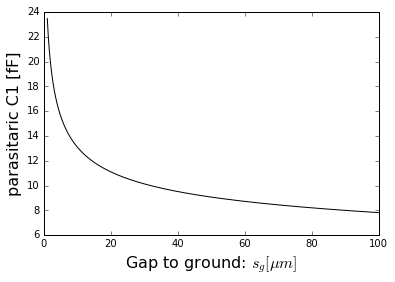

In [73]:
N = 5
w_real = 3.e-6
s = 3.e-6


#s_g = (N*w_real+(N2-1)*s)*ratio 
s_g = 36.e-6


print 'coupling capacitor: N = 5, l_finger = 80, ground = 10, s_g =', s_g*10**6, 'mu'

Cs_0 = Cs(C3(w_real,s,overlap1),CN(N,w_real,s,overlap1),C_end2(N,ground,w_real,G))
Cs_1 = Cs(C3(w_real,s,overlap1),CN(N,w_real,s,overlap1),C_end3(N,ground,w_real,G,s))
C1_0 = C1(w_real,s_g,overlap1,G)
C2_0 = C1_0/2.
print 'C1 =', C1_0*10**15, 'fF'
print 'C2 =', C2_0*10**15, 'fF'
print
print 'Cs (mit C_end2) =', Cs_0*10**15, 'fF'
print 'Cs (mit C_end3) =', Cs_1*10**15, 'fF'
print
print 'CN =', CN(N,w,s,overlap1)*10**15, 'fF'
fres = fresc(L_lres,C_lres,l_res,Cs_0,C2_0,0)
print 'f_res (s_g = ',s_g*10**6,' mu) =', fres*10**(-9), 'GHz'
print 'f_sim = 10.9725 GHz'

f1 = 11.01745e9
f2 = 10.92675e9
deltaf1 = f1 - f2 
Q_Load = Q_L(fres,deltaf1)
Q_ex = Q_ext(Q_int,Q_Load)
print 'Q_L =',Q_Load
print 'Q_ext =',Q_ex
wres = 2.*np.pi*10.9725e9
A = 1/(wres*Q_ex*Z_0)

C_coupling = A/2 + np.sqrt((A/2)**2.+A*C)
print 'approximation: Cc =', C_coupling*10**15, 'fF'


C_coup = C1_0*C2_0*Cs_0/(C1_0*C2_0+C1_0*Cs_0+C2_0*Cs_0)

#print C_coup*10**15, 'fF'
#print (C1_0+C2_0)*Cs_0/(C2_0+C1_0+Cs_0)
#print C1_0*Cs_0/(C1_0+Cs_0)
#print C1_0*C2_0/(C1_0+C2_0)

def C1(w,s_g,overlap,G):
        k5 = np.sqrt(s_g/(w+s_g))
        k6 = np.sqrt((np.exp(pi*w/h)-1.)/(np.exp(pi*(w+s_g)/h)-1.))
        Ccpw1 = 2.*epsilon_0*K(k_strich(k5))/K(k5)+epsilon_0*(e_r-1.)*K(k6)/K(k_strich(k6))
        print 'C_cpw1 =', Ccpw1*10**12, 'pF/m'
        return 2.*Ccpw1*(overlap+G)*10**15
    
def C11(w,s_g,overlap,G):
        k5 = np.sqrt(s_g*10**(-6)/(w+s_g*10**(-6)))
        k6 = np.sqrt((np.exp(pi*w/h)-1.)/(np.exp(pi*(w+s_g*10**(-6))/h)-1.))
        Ccpw1 = 2.*epsilon_0*K(k_strich(k5))/K(k5)+epsilon_0*(e_r-1.)*K(k6)/K(k_strich(k6))
        #print 'C_cpw1 =', Ccpw1*10**12, 'pF/m'
        return 2.*Ccpw1*(overlap+G)*10**15

gap = np.arange(1.e-6,100.e-6, 0.1e-6) 
gap1 = np.arange(1.,100., 0.1) 

#C1_0 = C1(w,gap*10**(-6),overlap1,G)
plt.plot(gap1,C11(w,gap1,overlap1,G),'k')
plt.xlabel('Gap to ground: $s_g [\mu m]$', fontsize = 16 )
plt.ylabel('parasitaric C1 [fF]', fontsize = 16 )
plt.show()

In [74]:


N = 8
w_real = 3.e-6
s = 3.e-6


#s_g = (N*w_real+(N-1)*s)*ratio 
s_g = 6.e-6

print 'coupling capacitor: N = 8, l_finger = 80, ground = 10, s_g =',s_g
print

Cs_0 = Cs(C3(w,s,overlap1),CN(N,w,s,overlap1),C_end2(N,ground,w,G))
Cs_1 = Cs(C3(w,s,overlap1),CN(N,w,s,overlap1),C_end3(N,ground,w,G,s))
C1_0 = C1(w,s_g2,overlap1,G)/2.
C2_0 = C1_0

print 'C1 =',C1_0*10**15,'fF'
print 'C2 =',C2_0*10**15, 'fF'
print
print 'Cs =', Cs_0*10**15, 'fF'
print 'Cs =', Cs_1*10**15, 'fF'
print
print 'CN =', CN(N,w,s,overlap1)*10**15, 'fF'
fres = fresc(L_lres,C_lres,l_res,Cs_0,C2_0,0)
print 'f_res (s_g =', s_g,' mu) =', fres*10**(-9), 'GHz'
print 'f_sim = 10.9725 GHz'

f1 = 11.01745e9
f2 = 10.92675e9
deltaf1 = f1 - f2 
Q_Load = Q_L(fres,deltaf1)
Q_ex = Q_ext(Q_int,Q_Load)
print 'Q_L =',Q_Load
print 'Q_ext =',Q_ex
wres = 2.*np.pi*10.9725e9
A = 1/(wres*Q_ex*Z_0)

C_coupling = A/2 + np.sqrt((A/2)**2.+A*C)
print 'approximation: Cc =', C_coupling*10**15, 'fF'





coupling capacitor: N = 8, l_finger = 80, ground = 10, s_g = 6e-06

C_cpw1 = 80.3614361539 pF/m
C1 = 6.18783058385e+15 fF
C2 = 6.18783058385e+15 fF

Cs = 35.0244393601 fF
Cs = 30.2313982014 fF

CN = 13.6750386718 fF
f_res (s_g = 6e-06  mu) = 2.14174510463e-06 GHz
f_sim = 10.9725 GHz
Q_L = 2.36135072175e-05
Q_ext = 2.36135075923e-05
approximation: Cc = 12285362.2532 fF


In [75]:
#coupling capacitor Jochen:


N = 13
w_real = 2.e-6
s = 2.e-6
l_finger = 36.e-6
G = s

#s_g = (N*w_real+(N2-1)*s)*ratio 
s_g = 10.e-6
overlap1 = l_finger - 2.*G
ground = 4.e-6


print 'coupling capacitor: N = 13, l_finger = 36, ground = 5, s_g =',s_g
print

Cs_0 = Cs(C3(w,s,overlap1),CN(N,w,s,overlap1),C_end2(N,ground,w,G))
C1_0 = C1(w,s_g2,overlap1,G)/2.
C2_0 = C1_0

print 'C1 =',C1_0*10**15,'fF'
print 'C2 =',C2_0*10**15, 'fF'
print 'C3 =',C3(w,s,overlap1)*10**15, 'fF'
print 'C_end =', C_end2(N,ground,w,G)*10**15, 'fF'
print 'Cs =', Cs_0*10**15, 'fF'
print 'CN =', CN(N,w,s,overlap1)*10**15, 'fF'
fres = fresc(L_lres,C_lres,l_res,Cs_0,C2_0,0)
print 'f_res (s_g =', s_g,' mu) =', fres*10**(-9), 'GHz'
print 'f_sim = 10.9725 GHz'


coupling capacitor: N = 13, l_finger = 36, ground = 5, s_g = 1e-05

C_cpw1 = 80.3614361539 pF/m
C1 = 2.73228882923e+15 fF
C2 = 2.73228882923e+15 fF
C3 = 4.81215981039 fF
C_end = 21.4051643885 fF
Cs = 39.6629997847 fF
CN = 13.4456755858 fF
f_res (s_g = 1e-05  mu) = 3.22309930847e-06 GHz
f_sim = 10.9725 GHz


In [76]:
#comparison to Göppl paper

from scipy.special import *
from math import *
import numpy as np  
from scipy.constants import *
import matplotlib.pyplot as plt

%matplotlib inline

#parameters of the finger capacitor:

cw = 10.e-6
cg = 6.6e-6

ratio = cg/cw

N = 8.                              #number of fingers
G = 3.e-6                            #gap at open finger end 
L = (100.e-6)-2*G                         #overlap of the fingers
                          

e_r = 11.9                          #dielectrical constant substrate:



#real finger width:
w_real = 3.3e-6
#metal layer thickness:
t = 200.e-9
#effective finger width to account for the thickness of the metallization layer
w = w_real+t/np.pi*(1+np.log(4*pi*w_real/t))
print 'thickness correction: ',w_real/w
#finger gap width
s = 3.3e-6

#substrate height:
h = 500.e-6

s_g = (N*w_real+(N-1)*s)*ratio               #gap of the outermost fingers to the ground planes:
#s_g = 70.e-6
print 's_g = ', s_g*10**6, 'mu' 

#complete elliptic integral of first kind
def K(x):
    return ellipk(x)

def k_strich(x):
    return np.sqrt(1.-x**2)


k5 = np.sqrt(s_g/(w+s_g))
k05 = np.sqrt(1.-k5**2.)
k6 = np.sqrt((np.exp(pi*w/h)-1.)/(exp(pi*(w+s_g)/h)-1.))
k06 = np.sqrt(1.-k6**2.)

Ccpw1 = 2.*epsilon_0*K(k_strich(k5))/K(k5)+epsilon_0*(e_r-1.)*K(k6)/K(k_strich(k6))

#capcitance at the left port (more fingers if the total number is odd)
C1 = 2.*Ccpw1*(L+G)

#capacitance at the right port:
C2 = C1/2.

##########################################################
#comparison to cpw:
w_cpw = 3.e-6
g_cpw = s_g+w+g

k0 = w_cpw/(w_cpw+2.*g_cpw)
k01 = (1.-k0**2.)**0.5
K0 = ellipk(k0)
K01 = ellipk(k01)

e1=11.9

eff1 = 5.05

C_l = 4*epsilon_0*eff1*(K0/K01)

print 'capacitance per unit length: C_l = ', C_l, 'F/m'
#########################################################

#C3: finger capacitor with 3 finger:
correctionk1 = np.sqrt((1-((w+2*s)/(3*w+2*s))**2.)/(1-(w/(3*w+2*s))**2))
k1 = (w/(w+2*s))*correctionk1
correctionk2 = np.sqrt((sinh(pi*(3*w+2*s)/(4*h))**2-sinh(pi*(w+2*s)/(4*h))**2)/(sinh(pi*(3*w+2*s)/(4*h))**2-sinh(pi*(w)/(4*h))**2))
k2 = np.sinh(pi*w/(4*h))/np.sinh(pi*(w+2*s)/(4*h))*correctionk2
q1 = K(k_strich(k1))*K(k2)/(K(k1)*K(k_strich(k2)))
e_eff = 1.+q1*(e_r-1.)/2.
C3 = 4*epsilon_0*e_eff*K(k1)/K(k_strich(k1))*L


#CN: (N-3) periodical structure
k3 = w/(w+s)
correctionk4 = np.sqrt((cosh(pi*(w+s)/(4*h))**2+sinh(pi*(w+s)/(4*h))**2)/(cosh(pi*(w)/(4*h))**2+sinh(pi*(w+s)/(4*h))**2))
k4 = np.sinh(pi*w/(4*h))/np.sinh(pi*(w+2*s)/(4*h))*correctionk4
q_N = K(k_strich(k3))*K(k4)/(K(k3)*K(k_strich(k4)))
e_N = 1.+q_N*(e_r-1.)/2.
CN = (N-3)*epsilon_0*e_N*K(k3)/K(k_strich(k3))*L


#C_end: capacitance of the fingers open ends 
# only valid for G/(w+2*s) < 0.2
e_oe = (e_r+1.)/2.
nu = G/(w+s)
C_oe1 = 2*(epsilon_0/np.pi)*((w+s)*(np.log(np.sqrt(1.+nu**2.)*nu)/nu+np.log((sqrt(1+nu**2)+1)/nu)-1/3*(1/(1+np.sqrt(1+nu**2.))+1/(nu+np.sqrt(1+nu**2))))-(w+2/3*s))
C_oe = e_oe*C_oe1
C_end = N*C_oe



#C_end: different approach:
ground = 10.e-6
k_1end = np.sinh(pi*w/(4*h))/np.sinh(pi*(w+G)/(4*h))
correctionk0 = np.sqrt((1.-((w+G)/(w+ground+G))**2.)/(1.-((w)/(w+ground+G))**2.))
k_0end = w/(w+G)*correctionk0
q_end = K(k_1end)*K(k_strich(k_0end))/(K(k_strich(k_1end))*K(k_0end))
e_end = 1+q_end*(e_r-1.)/2.
C_end2 = 4*N*w*(1+np.pi/2)*epsilon_0*e_end*K(k_0end)/K(k_strich(k_0end))

print 'C_end2 =', C_end2*10**15, 'fF'
print 'C_N =', CN*10**15, 'fF'


Cs = C3 + CN + C_end2
print 'Cs =',Cs*10**15, 'fF'
Cc = C1 + 1/(1/Cs + 1/C2)
Cc2 = C1+Cs+C2

C = (C1+C2+C1*C2/Cs)/(1+C2/Cs)

#print 'C =', C*10**15, 'fF'
#print Cc*10**15, 'fF'
#print Cc2*10**15, 'fF'


print get_C_idc_few(w_real,s,L,8)


print get_C_idc(w,s,L,8)

thickness correction:  0.891106886937
s_g =  32.67 mu
capacitance per unit length: C_l =  1.61249240329e-11 F/m
C_end2 = 14.0377739391 fF
C_N = 17.614556201 fF
Cs = 44.1174837622 fF
kInf = 0.707106781187
kEinf = 0.942809041582
CI = 12.0794705621 fF
CE = 18.8774188091 fF
63.0499324913
46.8606880824


In [77]:
w_real = 3.e-6
s = w_real
N = 3
ratio = 0.6
s_g = (N*w_real+(N-1)*s)*ratio 
print s_g

9e-06


In [78]:
N = 8

x = 0.25*s
k_1end = np.sinh(pi*x/(4*h))/np.sinh(pi*(x+G)/(4*h))
correctionk0 = np.sqrt((1.-((x+G)/(x+ground+G))**2.)/(1.-((x)/(x+ground+G))**2.))
k_0end = x/(x+G)*correctionk0
q_end = K(k_1end)*K(k_strich(k_0end))/(K(k_strich(k_1end))*K(k_0end))
e_end = 1+q_end*(e_r-1.)/2.
e_end2 = (11.9+1.)/2.
print 4*N*s*(1+np.pi/2)*epsilon_0*e_end2*K(k_0end)/K(k_strich(k_0end))*10**15, 'fF'


6.89306498826 fF


In [79]:
print k_1end
print w/(w+G)

0.199998889674
0.552456529188
